# K-Nearest Neighbour
Learn to use kNN for classification Plus learn about handwritten digit recognition using kNN

## Understanding k-Nearest Neighbour
Get a basic understanding of what kNN is
kNN是一种用于监督学习的最简单的分类算法之一。其思想是在特征空间中搜索与测试数据最接近的匹配项。我们将通过下面的图像来了解它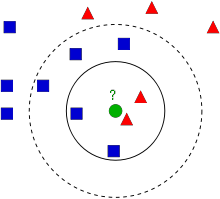

在这张图中，有两个家族：蓝色的方块和红色的三角形。我们将每个家族称为一个类别（Class）。他们的房子在他们的城镇地图中显示，我们称之为特征空间（Feature Space）。您可以将特征空间视为将所有数据投影的空间。例如，考虑一个二维坐标空间。每个数据点都有两个特征，即x坐标和y坐标。您可以在二维坐标空间中表示这个数据点，对吧？现在想象一下有三个特征，您将需要三维空间。现在考虑N个特征：您将需要N维空间，对吧？这个N维空间就是它的特征空间。在我们的图像中，您可以将其视为一个具有两个特征的二维情况。
现在考虑一下，如果一个新成员进入城镇并建立了一个新家，如图中的绿色圆圈所示，他应该被加入到蓝色或红色家族（或类别）之一。我们称这个过程为分类（Classification）。这个新成员应该如何被准确分类呢？由于我们正在处理kNN，让我们应用这个算法。
一个简单的方法是检查他最近的邻居是谁。从图中可以清楚地看出，他是红色三角家族的成员。因此，他被分类为红色三角形。这种方法称为最近邻分类（Nearest Neighbour classification），因为分类仅依赖于最近的邻居。
但这种方法有一个问题！红色三角形可能是最近的邻居，但如果附近还有很多蓝色方块怎么办？那么蓝色方块在该区域的强度比红色三角形更强，因此仅检查最近的方块是不够的。相反，我们可能想检查一些 k 个最近的家庭。那么无论哪个家族占多数，新来的家伙就应该属于那个家族。在我们的图像中，我们取 k=3，即考虑 3 个最近邻。新成员有两个红色邻居和一个蓝色邻居（有两个等距的蓝色邻居，但由于 k=3，我们只能取其中一个），因此他应该再次添加到红色家庭中。但如果我们取 k=7 呢？那么他有 5 个蓝色邻居和 2 个红色邻居，应该添加到蓝色家庭中。结果将随选定的 k 值而变化。请注意，如果k不是奇数，就会出现平局，就像在k=4的情况下发生的那样。我们会发现我们的新成员有2个红色邻居和2个蓝色邻居，作为他的四个最近的邻居，我们需要选择一种方法来打破平局以进行分类。因此，重申一下，这种方法称为k-最近邻算法，因为分类取决于k个最近的邻居。

在kNN中，我们确实考虑了k个邻居，但我们给予它们平等的重要性，对吗？这是否合理？例如，考虑k=4的平局情况。正如我们所看到的，2个红色邻居实际上比其他2个蓝色邻居更靠近新成员，因此他更有资格加入红色家庭。我们如何在数学上解释这一点？我们为每个邻居分配一些权重，这些权重取决于它们到新成员的距离：距离他更近的人获得更高的权重，而距离更远的人获得更低的权重。然后，我们分别添加每个家庭的总权重，并将新成员分类为哪个家庭获得更高总权重的一部分。这被称为修改的kNN或加权的kNN。

KNN in opencv
我们将在这里做一个简单的例子，有两个族（类），就像上面一样。然后在下一章中，我们将做一个更好的例子。

因此，在这里，我们将 Red 系列标记为 Class-0（用 0 表示），将 Blue 系列标记为 Class-1（用 1 表示）。我们创建 25 个邻居或 25 个训练数据，并将每个数据标记为 Class-0 或 Class-1 的一部分。我们可以借助 NumPy 的随机数生成器来完成此操作。

然后我们可以借助 Matplotlib 绘制它。红色邻居显示为红色三角形，蓝色邻居显示为蓝色方块。

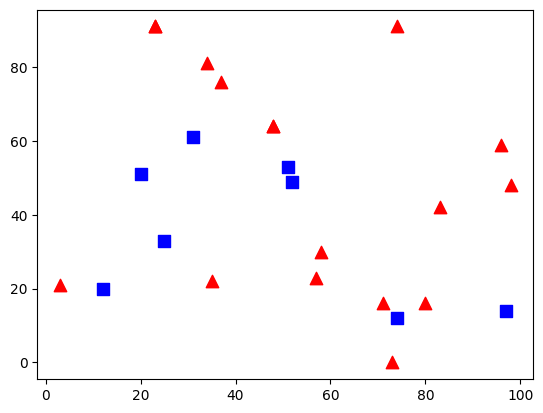

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
# Feature set containing (x,y) values of 25 known/training data
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)
# Label each one either Red or Blue with numbers 0 and 1
responses = np.random.randint(0,2,(25,1)).astype(np.float32)
# Take Red neighbours and plot them
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
# Take Blue neighbours and plot them
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')
plt.show()  

你将得到与我们的第一张图像类似的东西。由于您使用了随机数生成器，每次运行代码时都会获得不同的数据。
接下来，初始化kNN算法并传递trainData和responses以进行kNN训练。（在底层，它构建了一个搜索树：有关更多信息，请参阅下面的附加资源部分。）
然后，我们将引入一个新来者，并借助OpenCV中的kNN将其分类为属于某个家庭。在运行kNN之前，我们需要了解一些关于我们的测试数据（新来者的数据）的信息。我们的数据应该是一个浮点数组，大小为numberoftestdata×numberoffeatures。然后，我们找到新来者的最近邻居。我们可以指定k：我们想要多少个邻居。 （这里我们使用了3个。）它返回：
- 根据我们之前看到的kNN理论给出的新来者的标签。如果您想要最近邻居算法，只需指定k=1。
- k个最近邻居的标签。
- 从新来者到每个最近邻居的对应距离。
让我们看看它是如何工作的。新来者用绿色标记。

result: [[1.]]

neighbours: [[0. 1. 1.]]

distance: [[ 20. 113. 477.]]



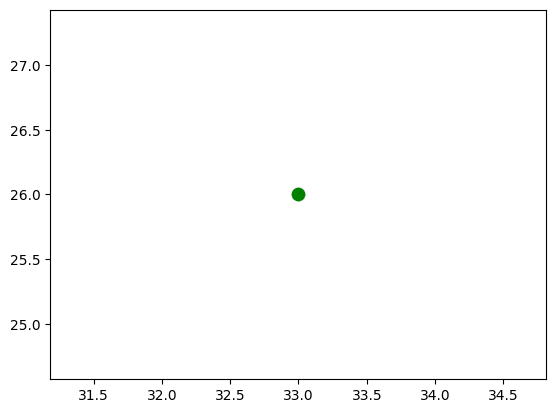

In [6]:
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')
# 创建一个K最近邻分类器对象。
knn = cv.ml.KNearest_create()
# 使用训练数据 trainData 和相应的标签 responses 对KNN分类器进行训练。cv.ml.ROW_SAMPLE 表示每行代表一个样本。
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
# 使用训练好的KNN分类器对新来者的数据点进行分类。这里的3表示要查找最近的3个邻居样本。函数返回了以下四个值：

# ret：一个标志，指示操作是否成功。
# results：包含了最终的分类结果。
# neighbours：包含了最近的邻居样本的标签。
# dist：包含了新来者与最近的邻居样本之间的距离。
ret, results, neighbours ,dist = knn.findNearest(newcomer, 3)
print( "result: {}\n".format(results) )
print( "neighbours: {}\n".format(neighbours) )
print( "distance: {}\n".format(dist) )
plt.show()

In [8]:
# 10 new-comers
newcomers = np.random.randint(0,100,(10,2)).astype(np.float32)
ret, results,neighbours,dist = knn.findNearest(newcomers, 3)
# The results also will contain 10 labels.

## OCR of Hand-written Data using kNN
We will use our knowledge on kNN to build a basic OCR (Optical Character Recognition) application.
We will try our application on Digits and Alphabets data that comes with OpenCV.

OCR of Hand-written Digits
我们的目标是构建一个可以识别手写数字的应用程序。为此，我们需要一些训练数据和一些测试数据。OpenCV带有一个名为digits.png的图像（位于opencv/samples/data/文件夹中），其中包含5000个手写数字（每个数字500个）。每个数字都是一个20x20的图像。因此，我们的第一步是将这个图像拆分为5000个不同的数字图像。然后，对于每个数字（20x20的图像），我们将其展平为一个包含400个像素的单行。这就是我们的特征集，即所有像素的强度值。这是我们可以创建的最简单的特征集。我们使用每个数字的前250个样本作为训练数据，其余250个样本作为测试数据。所以让我们首先准备它们。


In [9]:
import numpy as np
import cv2 as cv
img = cv.imread('digits.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
# Make it into a Numpy array: its size will be (50,100,20,20)
x = np.array(cells)
# Now we prepare the training data and test data
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)
# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()
# Initiate kNN, train it on the training data, then test it with the test data with k=1
knn = cv.ml.KNearest_create()
knn.train(train, cv.ml.ROW_SAMPLE, train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=5)
# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print( accuracy )

91.76


所以我们的基本OCR应用程序已经准备好了。这个特定的示例给了我91%的准确率。提高准确率的一个选项是添加更多用于训练的数据，特别是对于那些错误较多的数字。
而不是每次启动应用程序都找到这些训练数据，最好将其保存起来，这样下次就可以直接从文件中读取这些数据并开始分类。可以使用一些NumPy函数来实现，如np.savetxt、np.savez、np.load等。更多细节请查阅NumPy文档。

In [10]:
# Save the data
np.savez('knn_data.npz',train=train, train_labels=train_labels)
# Now load the data
with np.load('knn_data.npz') as data:
 print( data.files )
 train = data['train']
 train_labels = data['train_labels']

['train', 'train_labels']
